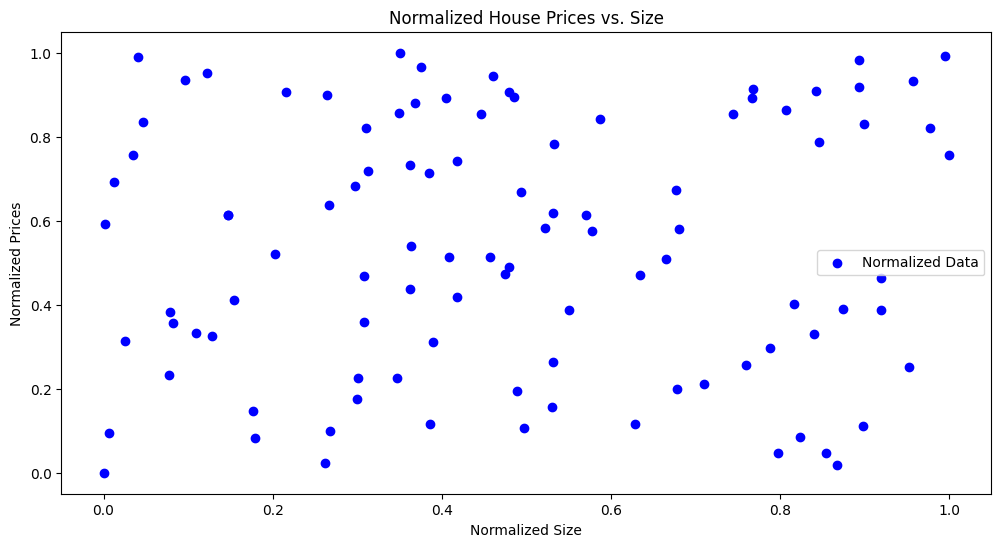

In [ ]:
# Q1_0119. 주어진 주택가격과 크기 데이터를 정규화, 시각화하여 비교해보세요

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 주어진 주택 가격과 크기 데이터
prices_expanded = np.random.uniform(100, 1000, 100)
size_expanded = np.random.uniform(20, 150, 100)

# MinMaxScaler를 사용하여 데이터 정규화
scaler = MinMaxScaler()
prices_normalized = scaler.fit_transform(prices_expanded.reshape(-1, 1)).flatten()
size_normalized = scaler.fit_transform(size_expanded.reshape(-1, 1)).flatten()

# 정규화된 데이터 시각화
plt.figure(figsize=(12, 6))
plt.scatter(size_normalized, prices_normalized, color='blue', label='Normalized Data')
plt.title('Normalized House Prices vs. Size')
plt.xlabel('Normalized Size')
plt.ylabel('Normalized Prices')
plt.legend()
plt.show()


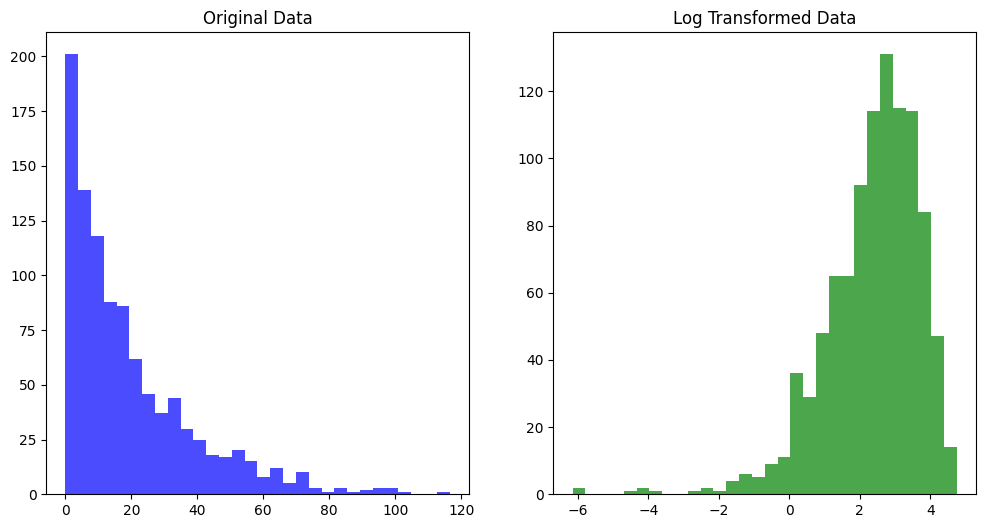

In [ ]:
# Q2_0119. 아래 데이터를 원본과 로그 변환한 결과를 1행 2열의 형태로 시각화하세요

import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data = np.random.exponential(scale=20.0, size=999)

# 로그 변환
log_data = np.log(data)

# 원본 데이터와 로그 변환 데이터 시각화
plt.figure(figsize=(12, 6))

# 원본 데이터 플롯
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title('Original Data')

# 로그 변환 데이터 플롯
plt.subplot(1, 2, 2)
plt.hist(log_data, bins=30, color='green', alpha=0.7)
plt.title('Log Transformed Data')

plt.show()




In [ ]:
# Q3_0119. 아래 문제를 수행하는 코드를 작성하세요

# 상황 정보

# - 특정 질병을 가진 사람이 테스트에서 양성 반응을 보일 확률(즉, 테스트의 민감도)이 99%라고 합니다.
# - 그리고 이 질병이 없는 사람이 음성 반응을 보일 확률(즉, 테스트의 특이성)도 99%라고 가정합니다.
# - 이 질병의 전체 인구에 대한 유병률이 1%라고 가정해 봅시다.

# 이제 한 사람이 이 테스트에서 양성 반응을 보였을 때, 그 사람이 실제로 이 질병을 가지고 있을 확률은 얼마일까요?

# 주어진 값들
P_A = 0.01  # 질병에 걸릴 확률 (유병률)
P_B_given_A = 0.99  # 질병이 있는 사람이 양성 반응을 보일 확률 (민감도)
P_B_given_not_A = 0.01  # 질병이 없는 사람이 양성 반응을 보일 확률 (1 - 특이성)

# P(B) 계산: 질병이 있는 사람이 양성 반응을 보일 확률과 질병이 없는 사람이 양성 반응을 보일 확률의 합
P_B = (P_B_given_A * P_A) + (P_B_given_not_A * (1 - P_A))

# 베이즈 정리에 따른 최종 확률 계산
P_A_given_B = (P_B_given_A * P_A) / P_B

P_A_given_B



0.5

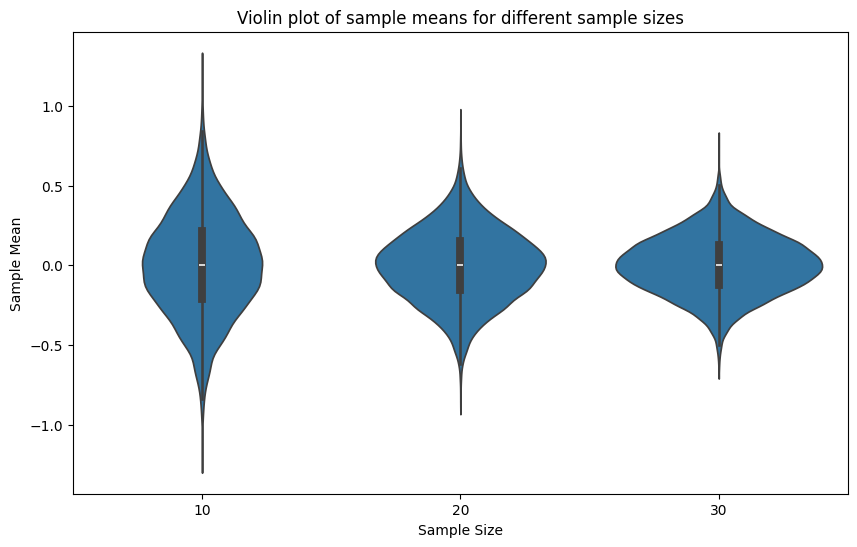

In [ ]:
#Q4_0119. 사용자 함수를 사용하여 샘플사이즈가 10,20, 30이고 샘플개수가 각각 10000개인 3개의 데이터프레임을 생성하여 결합한 후 바이올린 플롯을 그리고 결과를 서술하세요

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 사용자 정의 함수: 특정 샘플 크기에 대해 평균을 계산하고 데이터프레임을 반환
def generate_sample_means(sample_size, num_samples):
    sample_means = [np.mean(np.random.randn(sample_size)) for _ in range(num_samples)]
    df = pd.DataFrame({'sample_mean': sample_means, 'sample_size': [sample_size]*num_samples})
    return df

# 샘플 크기가 10, 20, 30인 표본을 10000개씩 생성
df_10 = generate_sample_means(10, 10000)
df_20 = generate_sample_means(20, 10000)
df_30 = generate_sample_means(30, 10000)

# 데이터프레임을 결합
combined_df = pd.concat([df_10, df_20, df_30])

# 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))
sns.violinplot(x='sample_size', y='sample_mean', data=combined_df)
plt.title('Violin plot of sample means for different sample sizes')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.show()

# 바이올린의 너비는 해당 표본 평균의 빈도 또는 밀도를 나타냅니다. 즉, 너비가 넓은 부분은 해당 표본 평균이 더 자주 나타난다는 것을 의미합니다.
# 표본 크기가 커질수록 바이올린 플롯의 분포가 더 좁아지는 것으로 보입니다. 이는 큰 표본 크기에서 표본 평균이 모평균에 더 가까워지고 변동성이 줄어든다는 것을 나타냅니다.
# 모든 표본 크기에 대해 표본 평균이 0을 중심으로 분포하는 것을 볼 수 있습니다. 이는 표본이 정규 분포에서 추출되었기 때문입니다.


In [ ]:
#Q5_0119. 어떤 질병 A가 인구 0.5%에게 발생한다고 가정하자. 질병을 진단할 확률 99%의 민감도와 95%의 특이도를 가지는 상황에서 한 사람이 테스트에서 양성 결과를 받았다. 
# 이 사람이 실제로 질병 A를 가지고 있을 확률은?
# -특이도는 질병이 없는 사람이 음성 반응을 보일 확률로 정의

# 주어진 확률 값들
P_A = 0.005  # 질병 A에 걸릴 확률
P_B_given_A = 0.99  # 질병이 있는 사람이 양성 반응을 보일 확률 (민감도)
P_negB_given_negA = 0.95  # 질병이 없는 사람이 음성 반응을 보일 확률 (특이도)
P_B_given_negA = 1 - P_negB_given_negA  # 질병이 없는 사람이 양성 반응을 보일 확률

# P(B) 계산
P_B = (P_B_given_A * P_A) + (P_B_given_negA * (1 - P_A))

# 베이즈 정리에 따른 P(A|B) 계산
P_A_given_B = (P_B_given_A * P_A) / P_B
P_A_given_B


0.09049360146252278

In [ ]:
# Q6_0119. 어떤 질병 B가 인구 중 2%에서 발생한다. 이 질병을 진단하는 또 다른 테스트는 90%의 민감도와 85%의 특이도를 가지는 상황에서 
# 한 사람이 이 테스트에서 음성 결과를 받았다. 이 사람이 실제로 질병 B를 가지고 있지 않을 확률은 얼마입니까?

# 주어진 확률 값들
P_B = 0.02  # 질병 B에 걸릴 확률
P_negB = 0.98  # 질병 B에 걸리지 않을 확률
P_T_given_B = 0.90  # 질병이 있는 사람이 양성 반응을 보일 확률 (민감도)
P_negT_given_negB = 0.85  # 질병이 없는 사람이 음성 반응을 보일 확률 (특이도)
P_negT_given_B = 1 - P_T_given_B  # 질병이 있는 사람이 음성 반응을 보일 확률

# P(음성) 계산
P_negT = (P_negT_given_B * P_B) + (P_negT_given_negB * P_negB)

# 베이즈 정리에 따른 P(질병 B가 없음 | 음성) 계산
P_negB_given_negT = (P_negT_given_negB * P_negB) / P_negT
P_negB_given_negT



0.9976047904191617